In [2]:
import pandas as pd
import numpy as np

import os
import re

In [85]:
df = pd.read_csv('../data/merged/merged_main.csv')

In [86]:
mapping = {
    "hdtv": "tv",
    "stove": "stove",
    "wifi": "wifi",
    "disney+": "disney+",
    "amazon prime video": "amazon prime video",
    "netflix": "netflix",
    "hbo max": "hbo max",
    "apple tv": "apple tv",
    "soap": "soap",
    "shampoo": "shampoo",
    "conditioner": "conditioner",
    "view": "has view",
    "oven": "oven",
    "clothing storage": "clothing storage",
    "fireplace": "fireplace",
    "refrigerator": "refrigerator",
    "air conditioning": "air conditioning",
    "fridge": "refrigerator",
    "pool": "pool",
    "gym": "gym",
    "housekeeping": "housekeeping",
    "free parking": "free parking",
    "paid parking": "paid parking",
    "washer": "washer",
    "dryer": "dryer",
    "children’s books and toys": "children’s books and toys",
    "coffee maker": "coffee maker",
    "bbq grill": "bbq grill",
    "exercise equipment": "exercise equipment",
    "sound system": "sound system",
    "security cameras": "security cameras",
    "golf": "golf",
    "sauna": "sauna",
    "bathtub": "bathtub",
    "board games": "board games",
    "game console": "game console",
    "smoke alarm": "smoke alarm",
    "fire alarm": "fire alarm",
    "fire extinguisher": "fire extinguisher"
}

In [88]:
 # Apply clean_facilities function to 'facilities' column
    df['cleaned_facilities'] = df['facilities'].apply(clean_facilities)

    # Create a set of unique facilities from the mapping values
    unique_facilities = list(set(mapping.values()))

    # Initialize facilities_df with zeros for each unique facility
    facilities_df = pd.DataFrame(0, index=df.index, columns=unique_facilities)

    # Iterate through each row in the DataFrame to map and filter facilities
    for idx, row in df.iterrows():
        
            for facility in row['cleaned_facilities']:
                facility_lower = facility.lower()
                if facility_lower in mapping:
                    mapped_facility = mapping[facility_lower]
                    facilities_df.loc[idx, mapped_facility] = 1

    # Concatenate the original DataFrame with the new facilities DataFrame
    result_df = pd.concat([df, facilities_df], axis=1)

Error processing: nan, error: malformed node or string: nan


In [61]:
from helper import clean_facilities

In [68]:
import ast

In [69]:
# Function to clean facilities
def clean_facilities(facilities_str):
    try:
        # Convert the string representation of list to an actual list
        facilities = ast.literal_eval(facilities_str)
        # Remove any "Unavailable" items
        cleaned_facilities = [item for item in facilities if not item.startswith('Unavailable')]
        return cleaned_facilities
    except Exception as e:
        print(f"Error processing: {facilities_str}, error: {e}")
        return []

In [63]:
def map_and_filter_facilities(facilities, mapping):
    mapped = []
    for facility in facilities:
        # Convert facility to lowercase and check if it exists in the mapping
        facility_lower = facility.lower()
        if facility_lower in mapping:
            mapped.append(mapping[facility_lower])
    return mapped

In [89]:
import pandas as pd
import numpy as np
import ast




In [90]:
result_df

,Unnamed: 0_x,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,...,fire alarm,golf,has view,gym,shampoo,security cameras,pool,bbq grill,sound system,oven
0,0,https://www.airbnb.com/rooms/31699739?adults=1...,Fulbaria,Home in Mymensingh · ★4.50 · 3 bedrooms · 4 be...,NaN,4 reviews,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.airbnb.com/rooms/94052072774264244...,Fulbaria,Resort in Beltoli · 1 bedroom · 1 bed · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
2,3,https://www.airbnb.com/rooms/93979221326458612...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,1,1,0
3,4,https://www.airbnb.com/rooms/93979244890044911...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
4,3,https://www.airbnb.com/rooms/95562398776708889...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,1427,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,Response rate: 100%,We have a lot of effort to bring more quality ...,...,0,0,0,0,0,0,0,0,0,0
1561,1422,https://www.airbnb.com/rooms/72423423715114280...,Patuakhali,Farm stay in Nalchhiti · 1 bedroom · 1 shared ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/480912074,Response rate: 100%,NaN,...,0,0,0,0,0,0,1,0,0,0
1562,1423,https://www.airbnb.com/rooms/83149822616480789...,Patuakhali,Rental unit in Bhola District · 1 bedroom · 1 ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/196991184,NaN,Our place is right at center of Bhola sadar Th...,...,0,0,0,0,0,0,0,1,0,0
1563,1425,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,...,0,0,0,0,1,0,0,0,0,0


In [76]:
result_df

,Unnamed: 0_x,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,...,fire alarm,golf,has view,gym,shampoo,security cameras,pool,bbq grill,sound system,oven
0,0,https://www.airbnb.com/rooms/31699739?adults=1...,Fulbaria,Home in Mymensingh · ★4.50 · 3 bedrooms · 4 be...,NaN,4 reviews,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.airbnb.com/rooms/94052072774264244...,Fulbaria,Resort in Beltoli · 1 bedroom · 1 bed · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
2,3,https://www.airbnb.com/rooms/93979221326458612...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,1,1,0
3,4,https://www.airbnb.com/rooms/93979244890044911...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
4,3,https://www.airbnb.com/rooms/95562398776708889...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,1427,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,Response rate: 100%,We have a lot of effort to bring more quality ...,...,0,0,0,0,0,0,0,0,0,0
1561,1422,https://www.airbnb.com/rooms/72423423715114280...,Patuakhali,Farm stay in Nalchhiti · 1 bedroom · 1 shared ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/480912074,Response rate: 100%,NaN,...,0,0,0,0,0,0,1,0,0,0
1562,1423,https://www.airbnb.com/rooms/83149822616480789...,Patuakhali,Rental unit in Bhola District · 1 bedroom · 1 ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/196991184,NaN,Our place is right at center of Bhola sadar Th...,...,0,0,0,0,0,0,0,1,0,0
1563,1425,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,...,0,0,0,0,1,0,0,0,0,0


In [84]:
def map_and_filter_facilities(facilities, mapping):
    mapped = []
    for facility in facilities:
        # Convert facility to lowercase and check if it exists in the mapping
        facility_lower = facility.lower()
        if facility_lower in mapping:
            mapped.append(mapping[facility_lower])
    return mapped


df['cleaned_facilities'] = df['facilities'].apply(clean_facilities)

unique_facilities = list(set(mapping.values()))

# Create a DataFrame with the unique facilities as columns, initialized with 0
facilities_df = pd.DataFrame(0, index=df.index, columns=unique_facilities)

# Iterate through each row in the DataFrame
for idx, row in df.iterrows():
    for facility in row['cleaned_facilities']:
        facility_lower = facility.lower()
        if facility_lower in mapping:
            mapped_facility = mapping[facility_lower]
            facilities_df.loc[idx, mapped_facility] = 1

# Concatenate the original DataFrame with the new facilities DataFrame
result_df = pd.concat([df, facilities_df], axis=1)

Error processing: nan, error: malformed node or string: nan


In [67]:
result_df

,Unnamed: 0_x,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,...,fire alarm,golf,has view,gym,shampoo,security cameras,pool,bbq grill,sound system,oven
0,0,https://www.airbnb.com/rooms/31699739?adults=1...,Fulbaria,Home in Mymensingh · ★4.50 · 3 bedrooms · 4 be...,NaN,4 reviews,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.airbnb.com/rooms/94052072774264244...,Fulbaria,Resort in Beltoli · 1 bedroom · 1 bed · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
2,3,https://www.airbnb.com/rooms/93979221326458612...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,1,1,0
3,4,https://www.airbnb.com/rooms/93979244890044911...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
4,3,https://www.airbnb.com/rooms/95562398776708889...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,1427,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,Response rate: 100%,We have a lot of effort to bring more quality ...,...,0,0,0,0,0,0,0,0,0,0
1561,1422,https://www.airbnb.com/rooms/72423423715114280...,Patuakhali,Farm stay in Nalchhiti · 1 bedroom · 1 shared ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/480912074,Response rate: 100%,NaN,...,0,0,0,0,0,0,1,0,0,0
1562,1423,https://www.airbnb.com/rooms/83149822616480789...,Patuakhali,Rental unit in Bhola District · 1 bedroom · 1 ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/196991184,NaN,Our place is right at center of Bhola sadar Th...,...,0,0,0,0,0,0,0,1,0,0
1563,1425,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df['price_per_night'] = df['price_per_night'].replace('[\$,]', '', regex=True).astype(float)

<Axes: >

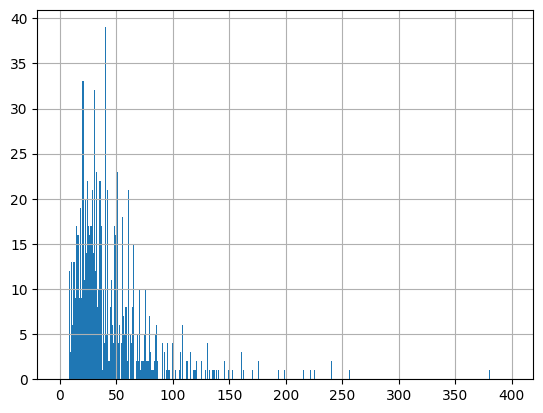

In [16]:
df['price_per_night'].hist(bins=[ i for i in range(0,400)])

In [17]:
df = df.reset_index()

In [18]:
df['host_response_rate'] = df['host_response_rate'].str.split(":",expand=True)[1]
df['host_response_rate'] = df['host_response_rate'].str.replace("%","")

In [19]:
df['host_response_rate']

0        NaN
1        100
2        100
3        100
4        100
        ... 
1560     100
1561     100
1562     NaN
1563     NaN
1564     NaN
Name: host_response_rate, Length: 1565, dtype: object

<Axes: ylabel='host_response_rate'>

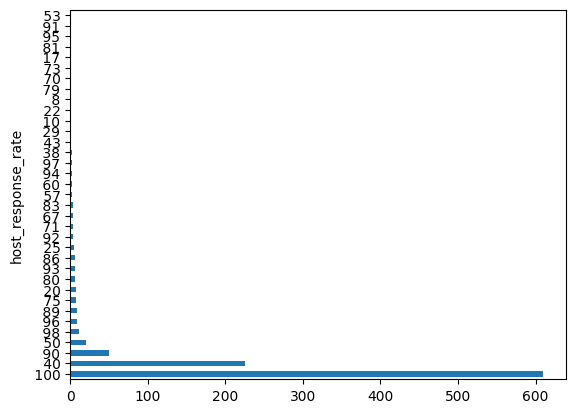

In [20]:
df['host_response_rate'].value_counts().plot(kind='barh')

In [21]:
# Function to extract latitude and longitude from URL
def extract_lat_lng(url):
    if isinstance(url, str):  # Check if url is a string (not NaN)
        params = url.split('?')[1].split('&')
        latitude = None
        longitude = None
        for param in params:
            key_value = param.split('=')
            if key_value[0] == 'll':
                lat_lng = key_value[1].split(',')
                latitude = float(lat_lng[0])
                longitude = float(lat_lng[1])
                break
        return latitude, longitude
    else:
        return None, None  # Return None for NaN values

# Apply the function to the 'url' column and create new columns for latitude and longitude
df[['latitude', 'longitude']] = df['google_map_location_link'].apply(lambda x: pd.Series(extract_lat_lng(x)))


In [22]:
df[['latitude', 'longitude']]

,latitude,longitude
0,24.778140,90.368330
1,24.698140,90.433410
2,24.757807,90.394817
3,24.757011,90.394424
4,24.756289,90.394372
...,...,...
1560,22.702143,90.371497
1561,22.652260,90.261080
1562,22.677600,90.642900
1563,22.778333,89.724451


In [23]:
df['review_count']

0       4 reviews
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1560          NaN
1561          NaN
1562          NaN
1563          NaN
1564          NaN
Name: review_count, Length: 1565, dtype: object

In [24]:
df['review_count'].value_counts()

review_count
1 review       162
2 reviews       74
3 reviews       47
4 reviews       39
5 reviews       23
              ... 
49 reviews       1
81 reviews       1
69 reviews       1
30 reviews       1
151 reviews      1
Name: count, Length: 65, dtype: int64

In [25]:
import ast

In [26]:
# Function to clean facilities
def clean_facilities(facilities_str):
    try:
        # Convert the string representation of list to an actual list
        facilities = ast.literal_eval(facilities_str)
        # Remove any "Unavailable" items
        cleaned_facilities = [item for item in facilities if not item.startswith('Unavailable')]
        return cleaned_facilities
    except Exception as e:
        print(f"Error processing: {facilities_str}, error: {e}")
        return []


In [ ]:

print(unique_facilities)

In [ ]:
len(unique_facilities)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Example list of strings
strings = unique_facilities

# Step 1: Vectorize the text data (convert strings to numerical vectors)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(strings)

# Step 2: Apply K-means clustering
num_clusters = 50  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Analyze the clusters
labels = kmeans.labels_
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(strings[i])

# Step 4: Print clusters
for cluster_id, cluster_items in clusters.items():
    print(f"Cluster {cluster_id + 1}:")
    for item in cluster_items:
        print(f"- {item}")
    print()

In [ ]:
unique_facilities



In [ ]:
df['listing_link'][1]

In [ ]:
df['cleaned_facilities'][1]

In [ ]:
df.info()

In [ ]:
df['cleaned_facilities']

In [ ]:
mapping = {
    "hdtv": "tv",
    "stove": "stove",
    "wifi": "wifi",
    "disney+": "disney+",
    "amazon prime video": "amazon prime video",
    "netflix": "netflix",
    "hbo max": "hbo max",
    "apple tv": "apple tv",
    "hulu": "hulu",
    "soap": "soap",
    "shampoo": "shampoo",
    "conditioner": "conditioner",
    "view": "has view",
    "oven": "oven",
    "clothing storage": "clothing storage",
    "fireplace": "fireplace",
    "refrigerator": "refrigerator",
    "air conditioning": "air conditioning",
    "fridge": "fridge",
    "pool": "pool",
    "gym": "gym",
    "housekeeping": "housekeeping",
    "free parking": "free parking",
    "paid parking": "paid parking",
    "washer": "washer",
    "dryer": "dryer",
    "children’s books and toys": "children’s books and toys",
    "coffee maker": "coffee maker",
    "bbq grill": "bbq grill",
    "exercise equipment": "exercise equipment",
    "sound system": "sound system",
    "security cameras": "security cameras",
    "golf": "golf",
    "sauna": "sauna",
    "bathtub": "bathtub",
    "board games": "board games",
    "game console": "game console",
    "smoke alarm":"smoke alarm",
    "fire alarm":"fire alarm",
    "fire extinguisher":"fire extinguisher"
}

In [ ]:
len(mapping)

In [ ]:
mapping = {
    "hdtv": "tv",
    "stove": "stove",
    "wifi": "wifi",
    "disney+": "disney+",
    "amazon prime video": "amazon prime video",
    "netflix": "netflix",
    "hbo max": "hbo max",
    "apple tv": "apple tv",
    "soap": "soap",
    "shampoo": "shampoo",
    "conditioner": "conditioner",
    "view": "has view",
    "oven": "oven",
    "clothing storage": "clothing storage",
    "fireplace": "fireplace",
    "refrigerator": "refrigerator",
    "air conditioning": "air conditioning",
    "fridge": "fridge",
    "pool": "pool",
    "gym": "gym",
    "housekeeping": "housekeeping",
    "free parking": "free parking",
    "paid parking": "paid parking",
    "washer": "washer",
    "dryer": "dryer",
    "children’s books and toys": "children’s books and toys",
    "coffee maker": "coffee maker",
    "bbq grill": "bbq grill",
    "exercise equipment": "exercise equipment",
    "sound system": "sound system",
    "security cameras": "security cameras",
    "golf": "golf",
    "sauna": "sauna",
    "bathtub": "bathtub",
    "board games": "board games",
    "game console": "game console",
    "smoke alarm": "smoke alarm",
    "fire alarm": "fire alarm",
    "fire extinguisher": "fire extinguisher"
}

def map_and_filter_facilities(facilities, mapping):
    mapped = []
    for facility in facilities:
        # Convert facility to lowercase and check if it exists in the mapping
        facility_lower = facility.lower()
        if facility_lower in mapping:
            mapped.append(mapping[facility_lower])
    return mapped

df['mapped_facilities'] = df['cleaned_facilities'].apply(lambda x: map_and_filter_facilities(x, mapping))



In [ ]:
df['mapped_facilities']


In [46]:
unique_facilities = list(set(mapping.values()))

In [42]:
result_df

,Unnamed: 0,listing_link,searched_location,title_bed_bats_review,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,...,fridge,golf,has view,gym,shampoo,security cameras,pool,bbq grill,sound system,oven
0,0,https://www.airbnb.com/rooms/31699739?adults=1...,Fulbaria,Home in Mymensingh · ★4.50 · 3 bedrooms · 4 be...,NaN,4 reviews,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.airbnb.com/rooms/94052072774264244...,Fulbaria,Resort in Beltoli · 1 bedroom · 1 bed · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
2,2,https://www.airbnb.com/rooms/10463077937269931...,Fulbaria,Rental unit in Mymensingh · 1 bedroom · 1 bed ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/199048845,NaN,Relax with the whole family at this peaceful p...,...,0,0,0,0,0,0,0,0,0,0
3,3,https://www.airbnb.com/rooms/93979221326458612...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,1,1,0
4,4,https://www.airbnb.com/rooms/93979244890044911...,Fulbaria,Resort in Mymensingh · 1 bedroom · 1 private bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/45832328,Response rate: 100%,NaN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,1425,https://www.airbnb.com/rooms/10257503846395791...,Patuakhali,Home in Fakirhat · 2 bedrooms · 2 beds · 1 bath,NaN,NaN,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,...,0,0,0,0,1,0,0,0,0,0
1574,1426,https://www.airbnb.com/rooms/52017590?adults=1...,Patuakhali,Villa in Bagerhat District · 1 bedroom · 1 bed...,NaN,NaN,NaN,https://www.airbnb.com/users/show/117580222,NaN,"Kick back and relax in this calm, stylish space.",...,0,0,0,0,0,0,0,0,0,0
1575,1427,https://www.airbnb.com/rooms/11301829800703733...,Patuakhali,Rental unit in Barisal · ★New · 20 bedrooms · ...,NaN,NaN,NaN,https://www.airbnb.com/users/show/566943528,Response rate: 100%,We have a lot of effort to bring more quality ...,...,0,0,0,0,0,0,0,0,0,0
1576,1428,https://www.airbnb.com/rooms/53844727?adults=1...,Patuakhali,Hotel in কলাপাড়া · 1 bedroom · 2 beds · 1 pri...,NaN,NaN,NaN,https://www.airbnb.com/users/show/337730115,NaN,This stylish place is close to must-see destin...,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df['mapped_facilities']

0                                                      []
1       [shampoo, clothing storage, sound system, chil...
2                                          [washer, wifi]
3       [shampoo, clothing storage, sound system, chil...
4       [shampoo, clothing storage, sound system, chil...
                              ...                        
1573                    [shampoo, air conditioning, wifi]
1574                                                   []
1575    [air conditioning, smoke alarm, fire extinguis...
1576                                  [smoke alarm, wifi]
1577                                               [wifi]
Name: mapped_facilities, Length: 1578, dtype: object

In [48]:
unique_facilities_link = unique_facilities.insert(0,'listing_link')

In [49]:
unique_facilities

['listing_link',
 'housekeeping',
 'disney+',
 'netflix',
 'air conditioning',
 'exercise equipment',
 'golf',
 'children’s books and toys',
 'bbq grill',
 'conditioner',
 'game console',
 'coffee maker',
 'fire extinguisher',
 'clothing storage',
 'fire alarm',
 'oven',
 'apple tv',
 'amazon prime video',
 'sauna',
 'smoke alarm',
 'pool',
 'has view',
 'soap',
 'refrigerator',
 'free parking',
 'fridge',
 'security cameras',
 'gym',
 'stove',
 'hbo max',
 'shampoo',
 'fireplace',
 'wifi',
 'dryer',
 'tv',
 'washer',
 'board games',
 'paid parking',
 'sound system',
 'bathtub']

In [50]:
result_df[unique_facilities]

,listing_link,housekeeping,disney+,netflix,air conditioning,exercise equipment,golf,children’s books and toys,bbq grill,conditioner,...,shampoo,fireplace,wifi,dryer,tv,washer,board games,paid parking,sound system,bathtub
0,https://www.airbnb.com/rooms/31699739?adults=1...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.airbnb.com/rooms/94052072774264244...,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,https://www.airbnb.com/rooms/10463077937269931...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,https://www.airbnb.com/rooms/93979221326458612...,0,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,1,0
4,https://www.airbnb.com/rooms/93979244890044911...,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,https://www.airbnb.com/rooms/10257503846395791...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1574,https://www.airbnb.com/rooms/52017590?adults=1...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1575,https://www.airbnb.com/rooms/11301829800703733...,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1576,https://www.airbnb.com/rooms/53844727?adults=1...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
     # Select specific columns
df = df[['listing_link', 'title_bed_bats_review']]

    # Duplicate the column
df['title_bed_bats_review - Copy'] = df['title_bed_bats_review']

    # Replace "·" with ","
df['title_bed_bats_review - Copy'] = df['title_bed_bats_review - Copy'].str.replace('·', ',')

    # Capitalize each word in the duplicated column
df['title_bed_bats_review - Copy'] = df['title_bed_bats_review - Copy'].str.title()

    # Split the column by delimiter
split_cols = df['title_bed_bats_review - Copy'].str.split(',', expand=True)
split_cols.columns = [f"title_bed_bats_review - Copy.{i+1}" for i in range(split_cols.shape[1])]

    # Concatenate the split columns back to the dataframe
df = pd.concat([df, split_cols], axis=1)

    # Rename columns
df = df.rename(columns={
        "title_bed_bats_review - Copy.2": "Bedroom",
        "title_bed_bats_review - Copy.3": "Beds",
        "title_bed_bats_review - Copy.4": "Baths"
    })

    # Duplicate the "Bedroom" column
df['Bedroom - Copy'] = df['Bedroom']

    # Remove "★" from "Bedroom - Copy" column
df['Bedroom - Copy'] = df['Bedroom - Copy'].str.replace('★', '')

    # Add conditional columns
df['Bedroom_Main'] = df.apply(lambda x: x['Bedroom - Copy'] if 'Bed' in str(x['Bedroom - Copy']) else None, axis=1)
df['Ratings'] = df.apply(lambda x: x['Bedroom - Copy'] if x['Bedroom_Main'] is None else None, axis=1)

    # Add "Main_Bedroom" column
df['Main_Bedroom'] = df.apply(lambda x: x['Beds'] if x['Bedroom_Main'] is None else x['Bedroom_Main'], axis=1)

    # Replace "Bedroom " with "Bedrooms" in "Beds" column
df['Beds'] = df['Beds'].str.replace('Bedroom ', 'Bedrooms')

    # Add "Beds_main" column
df['Beds_main'] = df.apply(lambda x: x['Baths'] if 'Bedrooms' in str(x['Beds']) else x['Beds'], axis=1)

    # Remove columns
df = df.drop(columns=['Bedroom', 'Bedroom - Copy', 'Bedroom_Main'])

    # Add "Main_Beds" column
df['Main_Beds'] = df.apply(lambda x: x['Beds_main'] if 'Bath' not in str(x['Beds_main']) else None, axis=1)

    # Remove "Beds" column
df = df.drop(columns=['Beds'])

    # Add "Bath_Main" column
df['Bath_Main'] = df.apply(lambda x: x['Beds_main'] if pd.isnull(x['Baths']) else x['Baths'], axis=1)

    # Add "Main_Baths" column
df['Main_Baths'] = df.apply(lambda x: x['Bath_Main'] if pd.isnull(x['title_bed_bats_review - Copy.5']) else x['title_bed_bats_review - Copy.5'], axis=1)

    # Remove columns
df = df.drop(columns=['Beds_main', 'Baths', 'title_bed_bats_review - Copy.5', 'Bath_Main'])

    # Replace unwanted strings in columns
replace_patterns = [
        ("Bedroom", ""), ("s", ""), ("Beds", ""), ("Bed", ""),
        ("Bath", ""), ("Private", ""), ("Shared", ""), ("Half", "1"),
        ("-", ""), ("Shared Bath", ""), ("Studio", "")
    ]

for old, new in replace_patterns:
        df['Main_Bedroom'] = df['Main_Bedroom'].str.replace(old, new)
        df['Main_Beds'] = df['Main_Beds'].str.replace(old, new)
        df['Main_Baths'] = df['Main_Baths'].str.replace(old, new)

    # Rename columns
df = df.rename(columns={"title_bed_bats_review - Copy.1": "Title"})

    # Remove the original 'title_bed_bats_review' column
df = df.drop(columns=['title_bed_bats_review'])

In [54]:
df

,listing_link,title_bed_bats_review - Copy,Title,Ratings,Main_Bedroom,Main_Beds,Main_Baths
0,https://www.airbnb.com/rooms/31699739?adults=1...,"Home In Mymensingh , ★4.50 , 3 Bedrooms , 4 Be...",Home In Mymensingh,4.50,3,4,2
1,https://www.airbnb.com/rooms/94052072774264244...,"Resort In Beltoli , 1 Bedroom , 1 Bed , 1 Bath",Resort In Beltoli,None,1,1,1
2,https://www.airbnb.com/rooms/10463077937269931...,"Rental Unit In Mymensingh , 1 Bedroom , 1 Bed ...",Rental Unit In Mymensingh,None,1,1,1
3,https://www.airbnb.com/rooms/93979221326458612...,"Resort In Mymensingh , 1 Bedroom , 1 Private Bath",Resort In Mymensingh,None,1,None,1
4,https://www.airbnb.com/rooms/93979244890044911...,"Resort In Mymensingh , 1 Bedroom , 1 Private Bath",Resort In Mymensingh,None,1,None,1
...,...,...,...,...,...,...,...
1573,https://www.airbnb.com/rooms/10257503846395791...,"Home In Fakirhat , 2 Bedrooms , 2 Beds , 1 Bath",Home In Fakirhat,None,2,2,1
1574,https://www.airbnb.com/rooms/52017590?adults=1...,"Villa In Bagerhat District , 1 Bedroom , 1 Bed...",Villa In Bagerhat District,None,1,1,1
1575,https://www.airbnb.com/rooms/11301829800703733...,"Rental Unit In Barisal , ★New , 20 Bedrooms , ...",Rental Unit In Barisal,New,20,None,20
1576,https://www.airbnb.com/rooms/53844727?adults=1...,"Hotel In কলাপাড়া , 1 Bedroom , 2 Beds , 1 Pri...",Hotel In কলাপাড়া,None,1,2,1


In [55]:
df.rename(columns={"Title":"listing_title",
                   "Ratings":"listing_rating",
                   "Main_Bedroom":"bedrooms",
                   "Main_Beds":"beds",
                   "Main_Baths":"baths"},inplace=True)

In [6]:
import pandas as pd

In [1]:
from clean_data import clean_airbnb_

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/merged/merged_main.csv')

In [5]:
df,facilities_df = clean_airbnb_('../data/merged/merged_main.csv')


In [6]:
df.columns

Index(['listing_link', 'price_per_night', 'review_count', 'review_count_link',
       'host_link', 'host_response_rate', 'listing_description',
       'cleanliness_ratings', 'accuracy_ratings', 'check-in_ratings',
       'communication_ratings', 'location_ratings', 'value_ratings',
       'facilities', 'base_urls', 'host_name', 'host_rating',
       'host_no_of_review', 'host_no_of_listing', 'host_listing_links',
       'host_about', 'listing_title', 'listing_rating', 'bedrooms', 'beds',
       'baths', 'latitude', 'longitude', 'Identity', 'Email address',
       'Phone number', 'Work email', 'host_hosting_duration_months'],
      dtype='object')

In [7]:
facilities_df.columns

Index(['base_urls', 'facilities', 'refrigerator', 'sound system', 'fire alarm',
       'soap', 'gym', 'smoke alarm', 'dryer', 'bathtub', 'free parking',
       'disney+', 'washer', 'board games', 'tv', 'apple tv', 'bbq grill',
       'golf', 'fire extinguisher', 'hbo max', 'game console', 'sauna',
       'amazon prime video', 'conditioner', 'fireplace', 'shampoo', 'netflix',
       'air conditioning', 'has view', 'security cameras', 'pool',
       'clothing storage', 'wifi', 'oven', 'children’s books and toys',
       'fridge', 'housekeeping', 'paid parking', 'stove', 'coffee maker',
       'exercise equipment'],
      dtype='object')

In [8]:
facilities_df.to_csv('../final_data/facilities.csv',index=False)

In [9]:
df

,listing_link,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,cleanliness_ratings,accuracy_ratings,check-in_ratings,...,bedrooms,beds,baths,latitude,longitude,Identity,Email address,Phone number,Work email,host_hosting_duration_months
0,https://www.airbnb.com/rooms/31699739?adults=1...,NaN,4,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,4.8,5.0,5.0,...,3,4,2,24.778140,90.368330,1,1,1,0,60.0
1,https://www.airbnb.com/rooms/94052072774264244...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,1,1,24.698140,90.433410,1,1,1,0,60.0
2,https://www.airbnb.com/rooms/93979221326458612...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.757807,90.394817,1,1,1,0,60.0
3,https://www.airbnb.com/rooms/93979244890044911...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.757011,90.394424,1,1,1,0,60.0
4,https://www.airbnb.com/rooms/95562398776708889...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.756289,90.394372,1,1,1,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,https://www.airbnb.com/rooms/11301829800703733...,NaN,0,NaN,https://www.airbnb.com/users/show/566943528,100.0,We have a lot of effort to bring more quality ...,NaN,NaN,NaN,...,20,None,20,22.702143,90.371497,1,1,1,0,2.0
1561,https://www.airbnb.com/rooms/72423423715114280...,NaN,0,NaN,https://www.airbnb.com/users/show/480912074,100.0,NaN,NaN,NaN,NaN,...,1,None,1,22.652260,90.261080,1,0,1,0,24.0
1562,https://www.airbnb.com/rooms/83149822616480789...,NaN,0,NaN,https://www.airbnb.com/users/show/196991184,NaN,Our place is right at center of Bhola sadar Th...,NaN,NaN,NaN,...,1,1,1,22.677600,90.642900,1,1,1,0,48.0
1563,https://www.airbnb.com/rooms/10257503846395791...,NaN,0,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,NaN,NaN,NaN,...,2,2,1,22.778333,89.724451,1,1,1,0,60.0


In [10]:
location_df = pd.read_csv('./location_data.csv')

In [11]:
location_df.columns

Index(['listing_link', 'latitude', 'longitude', 'continent', 'continentCode',
       'principalSubdivision', 'city', 'localityName', 'postcode', 'fips',
       'country_name', 'country_isoAlpha2', 'country_isoAlpha3'],
      dtype='object')

In [12]:
location_df = location_df[['listing_link','principalSubdivision', 'city', 'localityName','country_name']]

In [13]:
location_df

,listing_link,principalSubdivision,city,localityName,country_name
0,https://www.airbnb.com/rooms/31699739?adults=1...,Mymensingh Division,Mymensingh,Mymensingh,Bangladesh
1,https://www.airbnb.com/rooms/94052072774264244...,Mymensingh Division,Mymensingh,Mymensingh,Bangladesh
2,https://www.airbnb.com/rooms/10463077937269931...,Mymensingh Division,Mymensingh,Mymensingh,Bangladesh
3,https://www.airbnb.com/rooms/93979221326458612...,Mymensingh Division,Mymensingh,Mymensingh,Bangladesh
4,https://www.airbnb.com/rooms/93979244890044911...,Mymensingh Division,Mymensingh,Mymensingh,Bangladesh
...,...,...,...,...,...
1564,https://www.airbnb.com/rooms/10257503846395791...,Khulna Division,Fakirhat,Fakirhat,Bangladesh
1565,https://www.airbnb.com/rooms/52017590?adults=1...,Khulna Division,Kachua,Kachua,Bangladesh
1566,https://www.airbnb.com/rooms/11301829800703733...,Barisal Division,Barishal,Barishal,Bangladesh
1567,https://www.airbnb.com/rooms/53844727?adults=1...,Barisal Division,Kalapara,Kalapara,Bangladesh


In [14]:
df

,listing_link,price_per_night,review_count,review_count_link,host_link,host_response_rate,listing_description,cleanliness_ratings,accuracy_ratings,check-in_ratings,...,bedrooms,beds,baths,latitude,longitude,Identity,Email address,Phone number,Work email,host_hosting_duration_months
0,https://www.airbnb.com/rooms/31699739?adults=1...,NaN,4,https://www.airbnb.com/rooms/31699739/reviews?...,https://www.airbnb.com/users/show/165101119,NaN,NaN,4.8,5.0,5.0,...,3,4,2,24.778140,90.368330,1,1,1,0,60.0
1,https://www.airbnb.com/rooms/94052072774264244...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,1,1,24.698140,90.433410,1,1,1,0,60.0
2,https://www.airbnb.com/rooms/93979221326458612...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.757807,90.394817,1,1,1,0,60.0
3,https://www.airbnb.com/rooms/93979244890044911...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.757011,90.394424,1,1,1,0,60.0
4,https://www.airbnb.com/rooms/95562398776708889...,NaN,0,NaN,https://www.airbnb.com/users/show/45832328,100.0,NaN,NaN,NaN,NaN,...,1,None,1,24.756289,90.394372,1,1,1,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,https://www.airbnb.com/rooms/11301829800703733...,NaN,0,NaN,https://www.airbnb.com/users/show/566943528,100.0,We have a lot of effort to bring more quality ...,NaN,NaN,NaN,...,20,None,20,22.702143,90.371497,1,1,1,0,2.0
1561,https://www.airbnb.com/rooms/72423423715114280...,NaN,0,NaN,https://www.airbnb.com/users/show/480912074,100.0,NaN,NaN,NaN,NaN,...,1,None,1,22.652260,90.261080,1,0,1,0,24.0
1562,https://www.airbnb.com/rooms/83149822616480789...,NaN,0,NaN,https://www.airbnb.com/users/show/196991184,NaN,Our place is right at center of Bhola sadar Th...,NaN,NaN,NaN,...,1,1,1,22.677600,90.642900,1,1,1,0,48.0
1563,https://www.airbnb.com/rooms/10257503846395791...,NaN,0,NaN,https://www.airbnb.com/users/show/126063499,NaN,Welcome to our charming retreat in the heart o...,NaN,NaN,NaN,...,2,2,1,22.778333,89.724451,1,1,1,0,60.0


In [15]:
final_df = pd.merge(df,location_df,on='listing_link',how='inner')

In [16]:
final_df.to_csv('../final_data/airbnb_listing_host_location.csv',index=False)